In [8]:
import pandas as pd
import sklearn as sk

dane = pd.read_csv("C:/Users/majap/Documents/kursAI/dataset.csv")
dane=dane.drop(['Unnamed: 0','fc','pc','px_width','px_height'], axis=1)

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sk.set_config(transform_output="pandas")

text_pipeline = Pipeline([('imputer_t', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False)),
    ('scaler', MinMaxScaler())])
number_pipeline = Pipeline([('imputer_n', SimpleImputer(strategy='mean')),
                           ('scaler1', MinMaxScaler())])

ct = ColumnTransformer([
    ("t_pipe", text_pipeline, make_column_selector(dtype_include=object)),
    ("n_pipe", number_pipeline, make_column_selector(dtype_include=int)),
    ("n_pipe1", number_pipeline, make_column_selector(dtype_include=float))])

X = dane.drop(['price_range'], axis=1)
y = dane['price_range']

mapping = {
    'low cost': 0.0,
    'medium cost': 1.0,
    'high cost': 2.0,
    'very high cost': 3.0
}

y = y.map(mapping)

X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
X_valid=ct.transform(X_valid)


In [89]:
import keras as keras
from sklearn.metrics import mean_absolute_error

n_input_features = 19
model = keras.Sequential([
    keras.layers.Input((n_input_features,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)])

In [90]:
callbacks_list = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.7, patience=5, min_lr=0.00001)
]

optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="mse")
initial_weights = model.get_weights()

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 334.0301 - val_loss: 1.3868 - learning_rate: 0.1000
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3068 - val_loss: 1.2217 - learning_rate: 0.1000
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2510 - val_loss: 1.1949 - learning_rate: 0.1000
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2248 - val_loss: 0.9591 - learning_rate: 0.1000
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4848 - val_loss: 0.1743 - learning_rate: 0.1000
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1960 - val_loss: 0.1419 - learning_rate: 0.1000
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1663 - val_loss: 0.1605 - learning_rate: 0.1000
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1706 - val_loss: 0.1675 - learning_rate: 0.1000
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1691 - val_loss: 0.2327 - learning_rate: 0.1000
Epoch 10/100
43/4

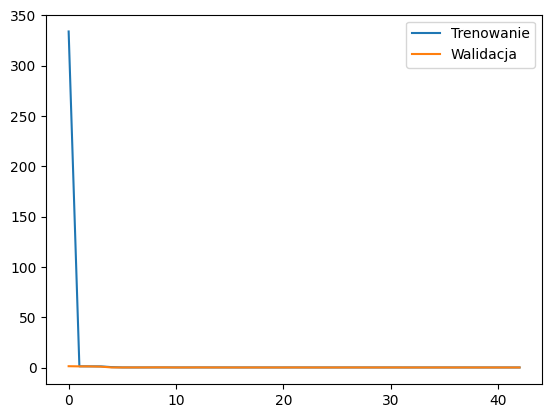

In [91]:
historia = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks_list, verbose=1)

plt.plot(historia.history['loss'], label='Trenowanie')
plt.plot(historia.history['val_loss'], label='Walidacja')
plt.legend()
plt.show()

In [92]:
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [93]:
mean_absolute_error(y_test, predictions)

0.3054743160461557